<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Power-Production-Data-Set" data-toc-modified-id="Power-Production-Data-Set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Power Production Data Set</a></span><ul class="toc-item"><li><span><a href="#Removing-Outliers" data-toc-modified-id="Removing-Outliers-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Removing Outliers</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-and-Polynomial-Regression" data-toc-modified-id="Linear-Regression-and-Polynomial-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear Regression and Polynomial Regression</a></span></li><li><span><a href="#Decision-Tree-Regression-and-Random-Forest-Regression" data-toc-modified-id="Decision-Tree-Regression-and-Random-Forest-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decision Tree Regression and Random Forest Regression</a></span></li><li><span><a href="#Passing-New-Data-to-the-Regression-Models" data-toc-modified-id="Passing-New-Data-to-the-Regression-Models-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Passing New Data to the Regression Models</a></span></li></ul></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Neural Network</a></span></li><li><span><a href="#Random-Forest-Tree-Regression-versus-Neural-Network" data-toc-modified-id="Random-Forest-Tree-Regression-versus-Neural-Network-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest Tree Regression versus Neural Network</a></span></li><li><span><a href="#Using-the-Model" data-toc-modified-id="Using-the-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using the Model</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Machine Learning: Predicting Power Production

This notebook builds a predictive machine learning model based on the speed and power data in the powerproduction.csv file. This model will be used in the web application power.py, which allows the user to enter a wind speed and returns an estimate of the power output. Below I assess five different models, two linear, two non-linear and a neural network, to determine which would be the most accurate and most efficient for the application. When this notebook is run the final model  is exported to a pickle file, model.pkl where it can be used by flash for the web application.

In [1]:
# Importing libraries
# Loading and examining data
import pandas as pd
# Converting data to numpy arrays for modelling
import numpy as np
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use("fivethirtyeight")
# Splitting the data
from sklearn.model_selection import train_test_split 
# Regression modelling
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as knn
# Model evaluation
from sklearn import metrics
# Creating neural network
import tensorflow.keras as kr
# Exporting model to file
import pickle

## Power Production Data Set

The power production data set is loaded and printed in full below and the descriptive statistics are generated.

In [2]:
# Loading the dataset
data = pd.read_csv("powerproduction.csv")

# View all data
pd.set_option("max_rows", None)
data

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [3]:
# Description of the data
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The descriptive statistics tell us that there are 500 rows in the data set. The data looks to be presented in ascending order of measured wind speed, which starts at 0 and tops out at 25. The mean wind speed is 12.5, which is very close to the median of the range, indicating a symmetric distribution. Power ranges between 0-114 with a mean of 48. It is also noted that the first 5 and last 10 entries have power values of 0.  

In [4]:
# Head of data set
data.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [5]:
# Tail of data set
data.tail(10)

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


To see whether there is a relationship between the variables, a simple correlation is calculated below. The resulting Pearson correlation coefficient (*r*) indicates a strong positive relationship between wind speed and power,  (https://www.statisticssolutions.com/pearsons-correlation-coefficient/#:~:text=High%20degree%3A%20If%20the%20coefficient,to%20be%20a%20small%20correlation.) i.e. that as one increases, so does the other. 

In [6]:
# Correlation
data[['speed', 'power']].corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


The data is visualised below. Wind speed looks to be quite uniformly distributed, while power seems to have a disproportionate number of zero values and values around the 100 mark. The correlation indicated above seems to be reflected in the scatterplot with power generally increasing with speed.   

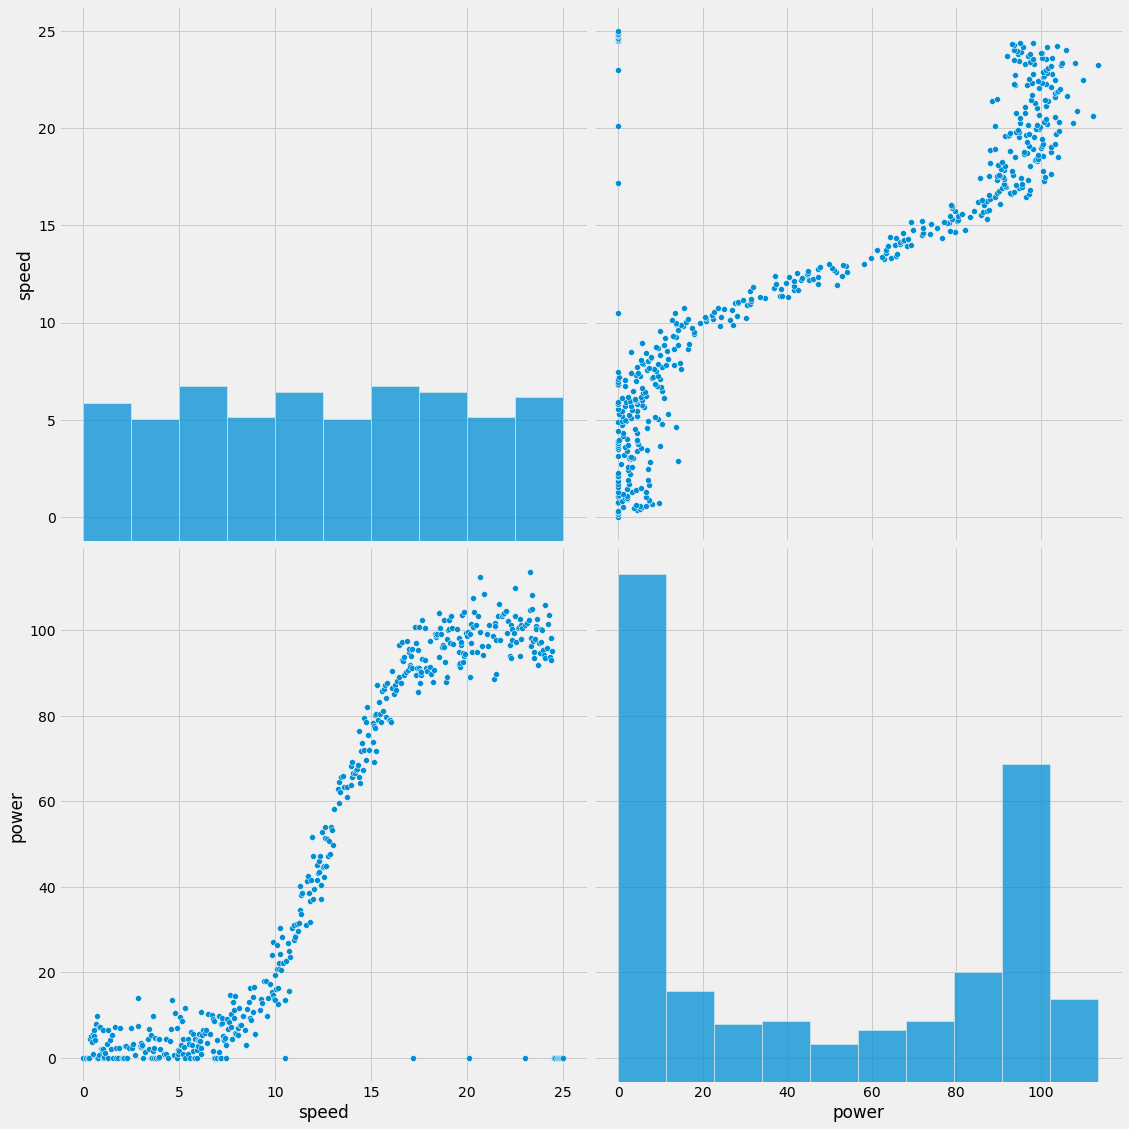

In [7]:
sns.pairplot(data, height=8)
plt.show()

Looking more closely at the scatterplot, the data is quite flat at the beginning, but between the values of about 8-18, power appears to sharply increase as speed increases and then looks to max out at a certain level and flatten out again. This s-shaped curve bears a resemblance to a sigmoid function, (https://en.wikipedia.org/wiki/Sigmoid_function) which has been observed to naturally occur in wind turbine power curves. (https://neerajdhanraj.medium.com/how-effectively-a-sigmoid-function-curve-can-be-fitted-with-a-scaled-weibull-cumulative-6f3a3dd7f19f) This is due to the way in which wind turbines are built to operate and can be boiled down to four characteristics:

- Cut-in speed: the speed at which electricity begins to be generated. Wind speeds below this are not strong enough to turn the blades and therefore no power is generated. 
- Rated output speed: The maximum wind speed that a turbine is designed to work with.
- Rated output power: The maximum power output of the turbine, which is based on the rated output speed.
- Cut-out speed: The wind speed at which the turbine shuts down to prevent damage. This halts power generation.
(http://owi-lab.com/content/modelling-power-curves-offshore-wind-turbines-machine-learning, http://mstudioblackboard.tudelft.nl/duwind/Wind%20energy%20online%20reader/Static_pages/power_curve.htm)

The chart below illustrates how these factors influence the shape of our data. 
<img src="http://owi-lab.com/sites/default/files/powercurves.jpg" alt="Wind Power Curve"/>

This helps to explain why the power values are not as evenly distributed as the wind speed values are in the histograms above. The abundance of values at the low end may represent the cut-in speed, just as the blades start turning, while the values at the top end probably indicate the turbine's rated output power.  

While the data set does not indicate the measurement units used, looking at other sources of wind power research indicates that the wind speed is likely measured in metres-per-second (m/s) and power is measured in kilowatts (kW) similar to the table below:

<img src="https://www.researchgate.net/profile/Bahtiyar_Dursun/publication/288372713/figure/tbl1/AS:669335785832464@1536593495834/Electrical-output-power-of-each-wind-turbine-for-different-wind-speed-values-29-31.png" alt="Speed and Power Measurements Example" width="550"/>

However, the units used are not important when it comes to developing a predictive model based on the values in this data set.

***

### Removing Outliers

When attempting to create models below, particularly the neural network, I encountered some difficulty getting a good fit with the raw data and I suspect this may be because of the number of 0-values in the power column. Not only are these present at the head and tail of the data, but they are also scattered in between. The plot below highlights the zero values in red.

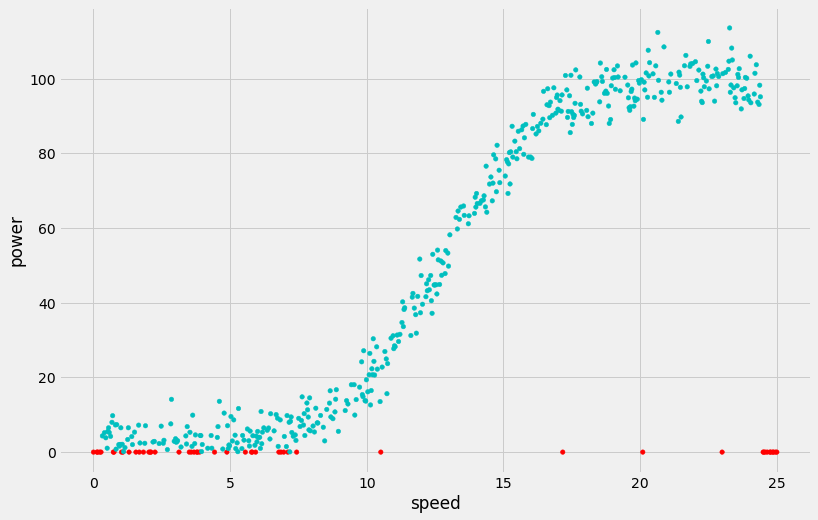

In [8]:
# Highlighting zero values - adapted from https://stackoverflow.com/a/46265462
colours = np.where(data["power"]==0,"r","c")
data.plot.scatter(x="speed", y="power", c=colours)
plt.show()

In [9]:
# Number of entries where the power value is 0 - adapted from https://stackoverflow.com/a/18173074
data[data.power == 0].count()

speed    49
power    49
dtype: int64

In all, 49 of the 500 power values are 0, which is quite a substantial proportion at nearly 10%. While the reasoning for this at the head and tail of the data set is explained above, once a turbine hits the cut-in speed and starts generating power, it would be expected that there is a recorded power output for each wind speed. Perhaps there were malfunctions, input errors or data corruption (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/) on these occasions that prohibited a power measurement from being taken. Whatever the reason, these outliers need to be dealt with in order to prevent them from harming a model's performance (https://towardsdatascience.com/increase-model-performance-by-removing-data-a87d05183d7c). 

Machine learning algorithms are trained based on the data supplied to them and so can be very sensitive to outliers.  (https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning#:~:text=as%20a%20group.-,Why%20is%20it%20important%20to%20identify%20the%20outliers%3F,models%20and%20ultimately%20poorer%20results.) A 0 power value would not provide a model with useful training information as there should be no reason for such a value if the wind turbine is operating correctly, outside of error/malfunction. Because of this, I made the decision to remove these figures from the dataset before creating the machine learning models.

In [10]:
# Data set without zeros - adapted from  https://stackoverflow.com/a/24489602
data_new = data[data.power != 0]

data_new.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


***

## Models

The aim of this project is to create a predictive model based on the speed and power data. This model should be able to take in a new wind speed measurement and accurately predict what the power output would be. Below I have compared the following models: 

- Linear Regression
- Polynomial Regression
- Decision Tree Regression
- Random Forest Regression

With the Python package, sklearn, these models are very easy to train and test. I also decided to train a neural network with keras to see how it performs compared to these machine learning models.  

Before creating any models, however, the data is converted to a numpy array, which is what machine learning algorithms in Python work with (https://becominghuman.ai/an-essential-guide-to-numpy-for-machine-learning-in-python-5615e1758301) and then split into training and testing sets. The latter is not mandatory but testing a model with values that are known helps with evaluation. (https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/) Here I decided to hold back 10% of the data for testing purposes, leaving 405 rows to train the models and 46 rows to test them. 

In [11]:
# Splitting data set and converting to numpy arrays
x = data_new['speed'].values.reshape(-1,1)
y = data_new['power'].values.reshape(-1,1)

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10)

# The sizes of each training and testing variable
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(405, 1) (46, 1) (405, 1) (46, 1)


### Linear Regression and Polynomial Regression

This data set represents the relationship between wind speed and power, specifically what the power output is for each measurement of wind speed. Therefore, power is a dependent variable that is determined by the independent variable, wind speed. Such a relationship is generally assessed with regression analysis. (https://en.wikipedia.org/wiki/Regression_analysis) Considering the data's resemblance to a sigmoid function, I thought this might be a good place to start. The sigmoid function can also be referred to as the logistic function, which is at the core of logistic regression. (https://machinelearningmastery.com/logistic-regression-for-machine-learning/) However, logistic regression is usually used to classify a categorical/binary dependent variable, i.e. a variable with two outcomes that can be represented by the sigmoid function with each observation as either end of the "S" as follows:

<img src="https://miro.medium.com/max/875/1*XisqJi764DTxragiRFexSQ.png" alt="Logistic Function for Regression" width="500"/>

This would not be suitable for our data, which represents a continuous range of power values. Usually the best place to start with regression of a continuous dependent variable is linear regression. (https://statisticsbyjim.com/regression/choosing-regression-analysis/) Since there is only one independent and one dependent variable here, I can use simple linear regression. Such a model attempts to fit a straight line to the data and makes predictions by finding the y-value (power) based on where the x-value (speed) falls on that line. The regression plot below shows the best fitting line for the data.

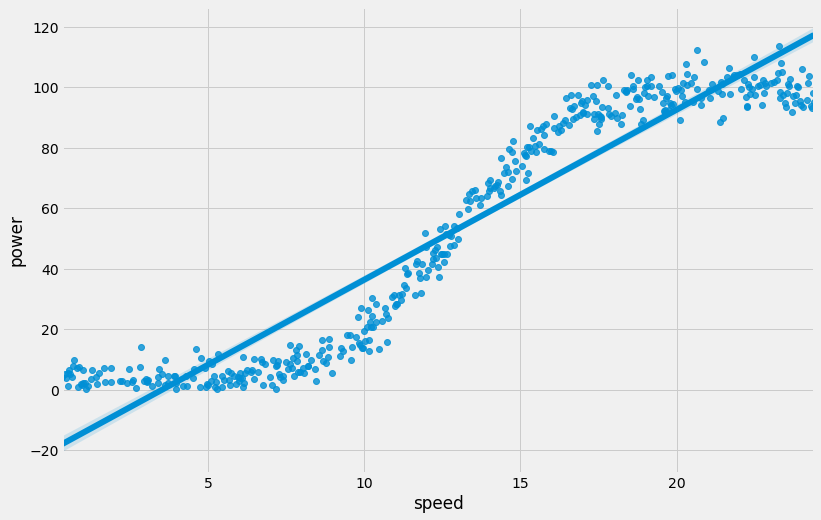

In [12]:
# Plotting the line of best fit
sns.regplot(x="speed", y="power", data=data_new)
plt.show()

Below the model is initialised and trained with the training data.

In [13]:
# Creating the model 
lin_model = LinearRegression()

# Training the model with training data
lin_model.fit(x_train, y_train)

LinearRegression()

To check the model, the x_test data is passed to it with the predict function. The model will return the predicted power values, which can then be compared to the actual values from the data set. Looking at the actual and predicted values side-by-side demonstrates a lot of discrepancy that indicates this model may not be suitable for our needs. 

In [14]:
# Testing prediction
lin_pred = lin_model.predict(x_test)

# Comparing predictions against acutal values.
test_lin = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lin_pred.flatten()})
test_lin

,Actual,Predicted
0,91.491,75.949338
1,1.360,-2.064673
2,44.745,50.225158
3,33.589,43.866118
4,5.385,25.494931
5,69.240,58.990016
6,3.912,13.906344
7,26.927,40.054083
8,90.171,74.678659
9,65.605,55.737079


Even though it seems clear that this model is not a great fit for the data, below shows the results of some of the main metrics used to assess regression models. (https://medium.com/acing-ai/how-to-evaluate-regression-models-d183b4f5853d)   

In [15]:
# Evaluating the performance of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lin_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred))  # very sensitive to outlliers
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred, squared=False))
print('R-squared:', metrics.r2_score(y_test, lin_pred))

Mean Absolute Error: 12.620463211784266
Mean Squared Error: 208.75693314524594
Root Mean Squared Error: 14.448423206192638
R-squared: 0.8684522097682367


- Mean Absolute Error (MAE): Measures the average distance between the actual values and the predicted values. The figure above shows that the model is off by an average of 12.6kW, which, when the range is between 0-113, is quite a significant margin of error.
- Mean Squared Error (MSE) / Root Mean Squared Error (RMSE): With the MSE the distances between actual and predicted values are squared, meaning that larger discrepancies yield larger errors. The RSME is then the square root of this value and is useful over the MAE when large errors are particularly undesirable,(https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) as they would be in a model designed to make accurate predictions.  
- R-Squared Coefficient of Determination - This indicates how strong the linear relationships is between two variables.  (https://www.investopedia.com/terms/c/coefficient-of-determination.asp) It is used to assess how close the data is to the regression line or how well the model has fit the data (https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the) and should be read as a percentage, i.e. if the value above is 0.86, then it could be said that 86% of the data points fall within the regression line. (https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/) Even though the R-squared value appears to indicate a good fit, the high MAE and RMSE figures shows that there are a large amount of errors. The R-squared value cannot be entirely trusted on its own as if the model consistently over or under-estimates predictions, the can essentially cancel each other out if they're symmetrical enough and result in a good R-squared value.  https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit The way the line passes through the data in the previously plotted line of best fit indicates that this may be the case here. 

It should not be surprising that this model is not a good fit and it is trying to fit a straight line to "curvy" data. In cases where a correlation exists between variables but the relationship does not appear to be strictly linear, we can try to fit a curved line to the data with polynomial regression. (https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb) This is very similar to linear regression but models on a line that is structured depending on the degree of the polynomial (https://towardsdatascience.com/polynomial-regression-the-only-introduction-youll-need-49a6fb2b86de). Where a linear function has a degree of 1, a polynomial can model quadratic (2 degrees), cubic (3 degrees) and higher functions. Some of these are illustrated in the graph below:

<img src="https://muthu.co/wp-content/uploads/2018/06/slide_4.jpg" alt="Polynomial Functions" width="500"/>

Below the training data is transformed to have polynomial features with a degree of 3. This value was chosen because the shape of the data looks similar to the cubic function above. Linear regression is performed on the altered data in the same way as simple linear regression. However, when making predictions with this model, any data passed to it needs to be adjusted with polynomial features.

In [16]:
# Polynomial Regression - adapted from https://towardsdatascience.com/polynomial-regression-bbe8b9d97491 

# Generate polynomial features with a degree of 3
poly_features = PolynomialFeatures(degree=3)

# Transform training data
x_train_poly = poly_features.fit_transform(x_train)

# Create the model with linear regression
poly_model = LinearRegression()

# Fit the model with the polynomial data
poly_model.fit(x_train_poly, y_train)

# Make predictions
poly_pred = poly_model.predict(poly_features.fit_transform(x_test))

# Evaluating the performance of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, poly_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred))  # very sensitive to outlliers
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, poly_pred, squared=False))
print('R-squared:', metrics.r2_score(y_test, poly_pred))

Mean Absolute Error: 5.367990418631759
Mean Squared Error: 43.030110914200016
Root Mean Squared Error: 6.559734058191689
R-squared: 0.9728846562415616


The metrics for the polynomial model look to be a huge improvement over simple linear regression with the MAE and RMSE values less than half of those measured for the latter. The R-squared value is also higher, which indicates this model is a  better fit with fewer errors 

Both model's predictions of the test data are plotted below along with the actual values in blue. As expected, the linear regression model's predictions run across a straight line, while the polynomial model follows the flow of the actual data much more closely.

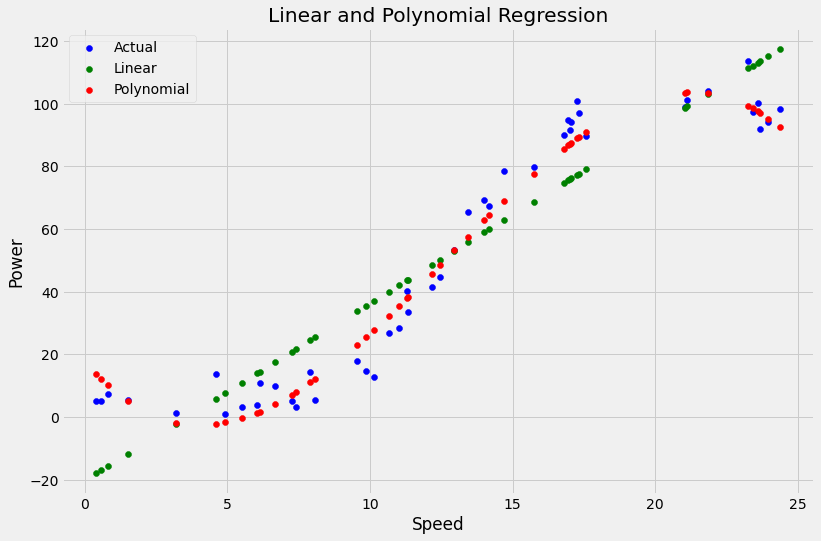

In [17]:
# Visualising Linear and Polynomial Regression - adapted from https://towardsdatascience.com/machine-learning-basics-polynomial-regression-3f9dd30223d1
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x_test, lin_pred, color = 'green')
plt.scatter(x_test, poly_pred, color = 'red')
plt.title('Linear and Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
labels = ("Actual", "Linear", "Polynomial")
plt.legend(labels)
plt.show()

### Decision Tree Regression and Random Forest Regression

While the polynomial model appears to fit the data well, it still operates along a single continuous line. It matches the shape of the data, but the data itself is more dispersed than a line can represent. For this reason, I decided to look at some non-linear models. I thought perhaps a model that is trained by breaking the data into smaller pieces might be more useful than one that tries to fit data to a line.  

Decision tree regression  is a commonly used non-linear algorithm that recursively partitions data into smaller and smaller subsets with decisions in between them. https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda The whole data set represents the root node, which is split into interior nodes based on the features of the data set. The branches from each node represent the decisions, such as True/False, and the outcomes are represented in the leaf nodes. This forms a tree-like structure, which can be visualised below

<img src="https://miro.medium.com/max/875/0*IY07ftCHvVuuw35_.png" alt="Decision Tree Graph" width="600"/>

Creating the model works much the same way as linear regression and the same metrics are used below to evaluate it.

In [18]:
# Decision Tree Regression - adapted from https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda
# Creating model
tree_model = DecisionTreeRegressor()

# Training the model
tree_model.fit(x_train, y_train)

# Making predictions
tree_pred = tree_model.predict(x_test)

# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, tree_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, tree_pred))  # very sensitive to outlliers 
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, tree_pred, squared=False))
print('R-squared:', metrics.r2_score(y_test, tree_pred))

Mean Absolute Error: 4.029108695652174
Mean Squared Error: 27.77859906521739
Root Mean Squared Error: 5.270540680539084
R-squared: 0.9824953678533829


Improvements are seen again here with smaller MAE and RMSE values and a more improved R-squared value than polynomial regression. However, decision trees can be problematic in that they are prone to over-fitting the data. https://www.saedsayad.com/decision_tree_overfitting.htm This means that the model fits the data too closely and so it has problems generalising and making predictions based on new data. https://www.investopedia.com/terms/o/overfitting.asp 
This problem can be resolved with random forest regression. https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda This works by creating randomly generated decision trees that are based on subsets of the data and getting the mean of their results to produce the final outcome. (https://en.wikipedia.org/wiki/Random_forest) Since it contains multiple decision trees, it does not have the same over-fitting issues as a a single decision tree model. 

Below a random forest ensemble model is generated for our data. The function allows you to choose the number of values from the dataset to become the root nodes for the decision trees. I have decided to leave this at the default value of 100 as the data set isn't very large or complex and it can be difficult to determine the optimal number of trees. (https://link.springer.com/chapter/10.1007/978-3-642-31537-4_13)

In [19]:
%%time
# Random Forest Regression - adapted from https://heartbeat.fritz.ai/random-forest-regression-in-python-using-scikit-learn-9e9b147e2153
# with help from https://stackoverflow.com/a/36120015

# Creating the model
forest_model = RandomForestRegressor()

# Training the model
forest_model.fit(x_train, y_train.ravel())

# Making predictions
forest_pred = forest_model.predict(x_test)

# Evaluating the model
forestMAE = metrics.mean_absolute_error(y_test, forest_pred)  
forestMSE = metrics.mean_squared_error(y_test, forest_pred)
forestRMSE = metrics.mean_squared_error(y_test, forest_pred, squared=False)
forestR2 = metrics.r2_score(y_test, forest_pred)

print('Mean Absolute Error:', forestMAE)
print('Mean Squared Error:', forestMSE)
print('Root Mean Squared Error:', forestRMSE)
print('R-squared:', forestR2)

Mean Absolute Error: 3.6926526086956466
Mean Squared Error: 22.507345179473763
Root Mean Squared Error: 4.744190676972603
R-squared: 0.9858170386116791
Wall time: 314 ms


The metrics for random forest regression are a slight improvement on those of decision tree regression and we also don't need to worry about over-fitting the data. Below I've plotted he predictions of the testing data for both models against the actual values and they look pretty closely aligned.

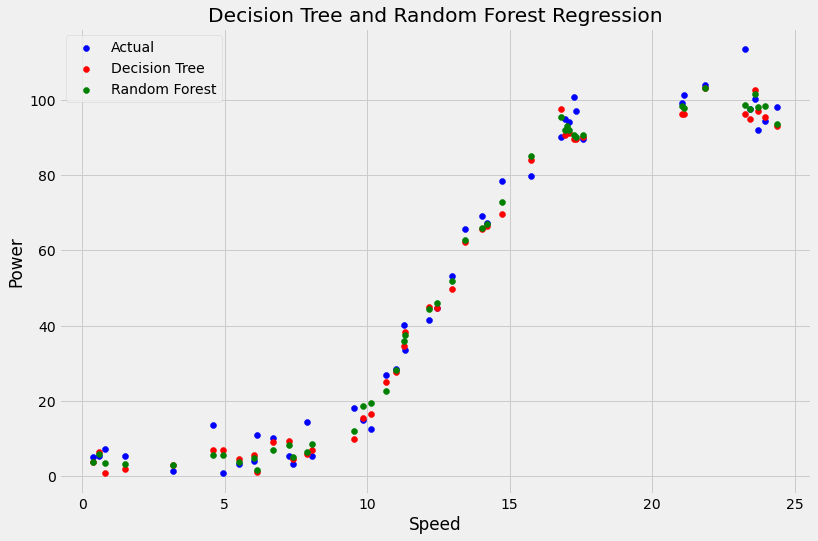

In [20]:
# Plotting decision tree and random forest regression predictions
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_test, y_test, color = 'blue')
plt.scatter(x_test, tree_pred, color = 'red')
plt.scatter(x_test, forest_pred, color = 'green')
plt.title('Decision Tree and Random Forest Regression')
plt.xlabel('Speed')
plt.ylabel('Power')
labels = ("Actual", "Decision Tree", "Random Forest")
plt.legend(labels)
plt.show()

### Passing New Data to the Regression Models

Below new data has been created, passed to each model and the predictions plotted.

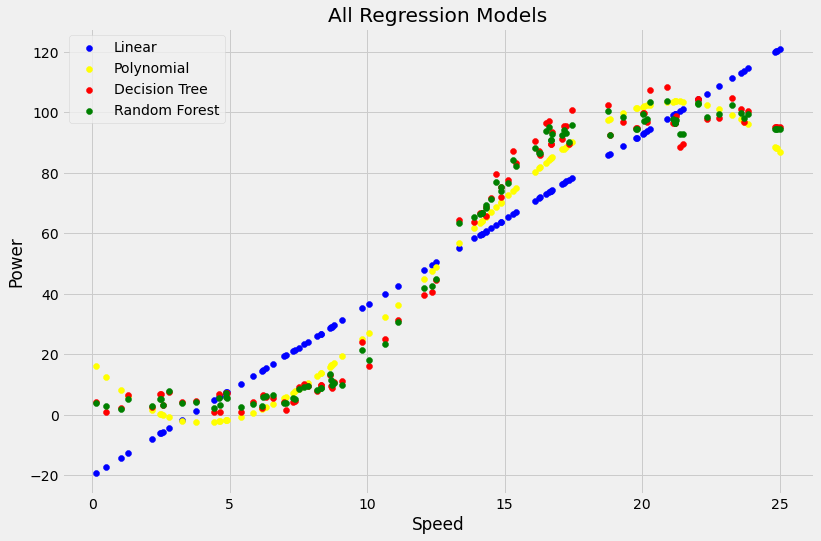

In [21]:
# Create new data and reshape
new = np.random.uniform(0, 25, 100)
new = new.reshape(-1, 1)

# Passing to models
lin_new_pred = lin_model.predict(new)
poly_new_pred = poly_model.predict(poly_features.fit_transform(new))
forest_new_pred = forest_model.predict(new)
tree_new_pred = tree_model.predict(new)

# Plotting all regression models with new data
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(new, lin_new_pred, color = 'blue')
plt.scatter(new, poly_new_pred, color = 'yellow')
plt.scatter(new, tree_new_pred, color = 'red')
plt.scatter(new, forest_new_pred, color = 'green')
plt.title('All Regression Models')
plt.xlabel('Speed')
plt.ylabel('Power')
labels = ("Linear", "Polynomial", "Decision Tree", "Random Forest")
plt.legend(labels)
plt.show()

This demonstrates how predictions based on the new data are fit to the shape of each model, with linear regression making predictions on a straight blue line and polynomial regression doing so on a cubic yellow line. Decision tree and random forest regression models are represented by red and green dots respectively, scattered in the overall shape of the original data set.

Based on the metrics, the best performing model is random forest regression. 

## Neural Network

The models developed above are based on supervised machine learning algorithms which learn based on a given set of data values and apply what they learn to new data. A predictive model can also be built with deep learning, which works by layering machine learning algorithms to create an artificial neural network that can eventually make decisions independent from the data on which it was first trained. (https://www.zendesk.com/blog/machine-learning-and-deep-learning/)

I found that it took a lot of trial and error to build a neural network that performed better than random forest regression, playing around with different numbers of layers and neurons, different activations and optimizers.  

Below I have built a very simple neural network with two layers. The first has 20 neuros



Attempting to fit the data using neural network and sigma function

How many hidden layers to use? How many neurons in the layer? 
Really difficult to do! https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/




In [22]:
# Create model
keras_model = kr.models.Sequential()

# Add layers
keras_model.add(kr.layers.Dense(20, activation = 'sigmoid', input_shape=[1]))
keras_model.add(kr.layers.Dense(1, activation = 'linear'))

# Compiling the model
keras_model.compile(loss='mse', optimizer="adam")

# Display the model
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [23]:
%%time
# Fitting the model
keras_model.fit(x_train, y_train, epochs=400, batch_size=10)

Epoch 1/400
41/41 [==============================] - 1s 2ms/step - loss: 4739.0304
Epoch 2/400
41/41 [==============================] - 0s 1ms/step - loss: 4405.4580
Epoch 3/400
41/41 [==============================] - 0s 1ms/step - loss: 4856.9514
Epoch 4/400
41/41 [==============================] - 0s 1ms/step - loss: 4451.7606
Epoch 5/400
41/41 [==============================] - 0s 1ms/step - loss: 4160.9005
Epoch 6/400
41/41 [==============================] - 0s 2ms/step - loss: 4253.9801
Epoch 7/400
41/41 [==============================] - 0s 2ms/step - loss: 4032.0182
Epoch 8/400
41/41 [==============================] - 0s 2ms/step - loss: 3930.5934
Epoch 9/400
41/41 [==============================] - 0s 2ms/step - loss: 3723.5082
Epoch 10/400
41/41 [==============================] - 0s 2ms/step - loss: 4089.4662
Epoch 11/400
41/41 [==============================] - 0s 2ms/step - loss: 3626.4481
Epoch 12/400
41/41 [==============================] - 0s 2ms/step - loss: 3834.2745
E

41/41 [==============================] - 0s 2ms/step - loss: 1191.2443
Epoch 99/400
41/41 [==============================] - 0s 2ms/step - loss: 1113.7346
Epoch 100/400
41/41 [==============================] - 0s 2ms/step - loss: 1200.7142
Epoch 101/400
41/41 [==============================] - 0s 2ms/step - loss: 1186.2342
Epoch 102/400
41/41 [==============================] - 0s 2ms/step - loss: 1098.9553
Epoch 103/400
41/41 [==============================] - 0s 2ms/step - loss: 1179.9930
Epoch 104/400
41/41 [==============================] - 0s 2ms/step - loss: 1203.3790
Epoch 105/400
41/41 [==============================] - 0s 2ms/step - loss: 1083.9222
Epoch 106/400
41/41 [==============================] - 0s 2ms/step - loss: 1061.8322
Epoch 107/400
41/41 [==============================] - 0s 2ms/step - loss: 1057.4044
Epoch 108/400
41/41 [==============================] - 0s 2ms/step - loss: 1101.4591
Epoch 109/400
41/41 [==============================] - 0s 2ms/step - loss: 1009.

41/41 [==============================] - 0s 2ms/step - loss: 160.0720
Epoch 196/400
41/41 [==============================] - 0s 2ms/step - loss: 161.8054
Epoch 197/400
41/41 [==============================] - 0s 2ms/step - loss: 148.8680
Epoch 198/400
41/41 [==============================] - 0s 2ms/step - loss: 140.1624
Epoch 199/400
41/41 [==============================] - 0s 2ms/step - loss: 136.3465
Epoch 200/400
41/41 [==============================] - 0s 2ms/step - loss: 141.0013
Epoch 201/400
41/41 [==============================] - 0s 2ms/step - loss: 139.3529
Epoch 202/400
41/41 [==============================] - 0s 2ms/step - loss: 138.8398
Epoch 203/400
41/41 [==============================] - 0s 2ms/step - loss: 123.1471
Epoch 204/400
41/41 [==============================] - 0s 2ms/step - loss: 126.4749
Epoch 205/400
41/41 [==============================] - 0s 2ms/step - loss: 119.6453
Epoch 206/400
41/41 [==============================] - 0s 2ms/step - loss: 111.2004
Epoch 

41/41 [==============================] - 0s 2ms/step - loss: 19.5519
Epoch 294/400
41/41 [==============================] - 0s 2ms/step - loss: 19.3041
Epoch 295/400
41/41 [==============================] - 0s 2ms/step - loss: 16.5366
Epoch 296/400
41/41 [==============================] - 0s 2ms/step - loss: 18.3775
Epoch 297/400
41/41 [==============================] - 0s 2ms/step - loss: 20.1694
Epoch 298/400
41/41 [==============================] - 0s 2ms/step - loss: 18.6414
Epoch 299/400
41/41 [==============================] - 0s 2ms/step - loss: 18.6327
Epoch 300/400
41/41 [==============================] - 0s 2ms/step - loss: 17.9272
Epoch 301/400
41/41 [==============================] - 0s 2ms/step - loss: 18.5165
Epoch 302/400
41/41 [==============================] - 0s 2ms/step - loss: 18.4886
Epoch 303/400
41/41 [==============================] - 0s 2ms/step - loss: 16.7721
Epoch 304/400
41/41 [==============================] - 0s 2ms/step - loss: 18.3669
Epoch 305/400
41/4

41/41 [==============================] - 0s 2ms/step - loss: 17.0483
Epoch 392/400
41/41 [==============================] - 0s 2ms/step - loss: 17.1986
Epoch 393/400
41/41 [==============================] - 0s 2ms/step - loss: 18.7275
Epoch 394/400
41/41 [==============================] - 0s 2ms/step - loss: 18.7261
Epoch 395/400
41/41 [==============================] - 0s 2ms/step - loss: 16.3254
Epoch 396/400
41/41 [==============================] - 0s 2ms/step - loss: 16.0689
Epoch 397/400
41/41 [==============================] - 0s 2ms/step - loss: 16.0207
Epoch 398/400
41/41 [==============================] - 0s 2ms/step - loss: 16.1096
Epoch 399/400
41/41 [==============================] - 0s 2ms/step - loss: 18.3697
Epoch 400/400
41/41 [==============================] - 0s 2ms/step - loss: 17.0391
Wall time: 33.6 s


In [24]:
keras_model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 1ms/step - loss: 16.8453


16.84531021118164

In [25]:
keras_pred = keras_model.predict(x_test)

In [26]:
kerasMAE = metrics.mean_absolute_error(y_test, keras_pred)  
kerasMSE = metrics.mean_squared_error(y_test, keras_pred)
kerasRMSE = metrics.mean_squared_error(y_test, keras_pred, squared=False)
kerasR2 = metrics.r2_score(y_test, keras_pred)

print('Mean Absolute Error:', kerasMAE)
print('Mean Squared Error:', kerasMSE)
print('Root Mean Squared Error:', kerasRMSE)
print('R-squared:', kerasR2)

Mean Absolute Error: 3.5828011139164806
Mean Squared Error: 22.22052444672596
Root Mean Squared Error: 4.713865128185782
R-squared: 0.9859977781589466


## Random Forest Tree Regression versus Neural Network

Below I have compared the metrics of the random 

In [27]:
forest_metrics = [forestMAE, forestMSE, forestRMSE, forestR2]
keras_metrics = [kerasMAE, kerasMSE, kerasRMSE, kerasR2]

metrics= pd.DataFrame({'Forest': forest_metrics, 'Keras': keras_metrics}, index=["MAE", "MSE", "RMSE", "R-Squared"])
metrics

,Forest,Keras
MAE,3.692653,3.582801
MSE,22.507345,22.220524
RMSE,4.744191,4.713865
R-Squared,0.985817,0.985998


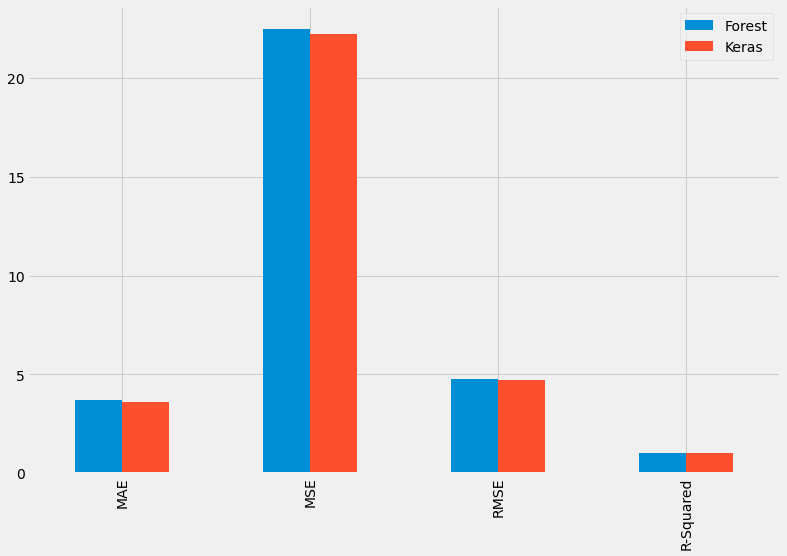

In [28]:
metrics.plot.bar()
plt.show()

In this particular instance, a neural network is probably overkill. Neural networks are complex, computationally expensive, and work best with a large amount of data. (https://towardsdatascience.com/3-reasons-to-use-random-forest-over-a-neural-network-comparing-machine-learning-versus-deep-f9d65a154d89) However, the data set here is quite small and the relationship being examined is not complicated. The difference between the neural network's performance and that of random forest regression is not enough to justify the time complexity of the neural network. Such tree-based methods have been referred to as simplified neural networks in the way they break down data (https://towardsdatascience.com/when-and-why-tree-based-models-often-outperform-neural-networks-ceba9ecd0fd8) so perhaps this accounts for the similar results. Either way, I have decided to choose the Random forest regression model for implementation in the web application as it has excellent performance metrics, is not prone to over-fitting and is less complex and time-consuming than a neural network. 

## Using the Model

The use the random forest model outside of this notebook, I have 

Below the random_forest and neural network models are exported to a pickle file to be used in the web application. The pickle module converts the models to streams of bytes and stores them in files where they can be used by other applications. (http://zetcode.com/python/pickle/) 

In [29]:
# Pickling random forest model
filename1 = "model.pkl"

pickle.dump(forest_model, open(filename1, "wb"))

## References

